In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\Woody\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Woody\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
train_labels[10] #10번째 기사는 3번토픽에 해당

3

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46): #인덱스만 1이고 나머진 모두 0
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
#위의 셀과 같은 효과를 주는 keras내장함수
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#훈련검증

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 7s 328ms/step - loss: 3.0330 - accuracy: 0.3547 - val_loss: 1.6972 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 1s 64ms/step - loss: 1.4687 - accuracy: 0.6969 - val_loss: 1.2758 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 1s 76ms/step - loss: 1.0448 - accuracy: 0.7750 - val_loss: 1.1215 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 60ms/step - loss: 0.8304 - accuracy: 0.8249 - val_loss: 1.0262 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.6715 - accuracy: 0.8645 - val_loss: 0.9970 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 60ms/step - loss: 0.5210 - accuracy: 0.8949 - val_loss: 0.9581 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 81ms/step - loss: 0.4217 - accuracy: 0.9125 - val_loss: 0.9059 - val_accuracy: 0.8130
Epoch 8/20
1

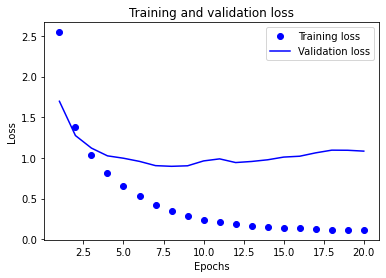

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

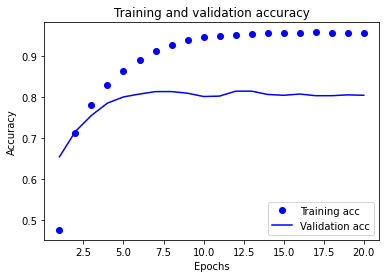

In [16]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
#과대적합 조정을 위해 에포크를 9로 줄이고 재훈련
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 4s 101ms/step - loss: 3.6611 - accuracy: 0.3968 - val_loss: 3.2928 - val_accuracy: 0.6250
Epoch 2/9
16/16 [==============================] - 1s 81ms/step - loss: 3.1174 - accuracy: 0.6850 - val_loss: 2.7270 - val_accuracy: 0.6030
Epoch 3/9
16/16 [==============================] - 1s 60ms/step - loss: 2.4644 - accuracy: 0.6861 - val_loss: 2.0904 - val_accuracy: 0.6240
Epoch 4/9
16/16 [==============================] - 1s 57ms/step - loss: 1.8250 - accuracy: 0.6951 - val_loss: 1.6857 - val_accuracy: 0.6430
Epoch 5/9
16/16 [==============================] - 1s 58ms/step - loss: 1.4062 - accuracy: 0.7100 - val_loss: 1.4878 - val_accuracy: 0.6630
Epoch 6/9
16/16 [==============================] - 1s 54ms/step - loss: 1.1588 - accuracy: 0.7396 - val_loss: 1.3974 - val_accuracy: 0.6640
Epoch 7/9
16/16 [==============================] - 1s 64ms/step - loss: 1.0066 - accuracy: 0.7508 - val_loss: 1.3441 - val_accuracy: 0.7100
Epoch 8/9
16/16 [==

In [18]:
results

[1.343592882156372, 0.7355298399925232]

In [19]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19545859305431879

In [20]:
predictions = model.predict(x_test)

In [21]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [22]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [23]:
#중간층이 46보다 작으면? 정보의 병목현상 야기

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 4s 32ms/step - loss: 3.3348 - accuracy: 0.2246 - val_loss: 2.4243 - val_accuracy: 0.3670
Epoch 2/20
63/63 [==============================] - 1s 23ms/step - loss: 2.2368 - accuracy: 0.3942 - val_loss: 1.9650 - val_accuracy: 0.4130
Epoch 3/20
63/63 [==============================] - 2s 29ms/step - loss: 1.7697 - accuracy: 0.4516 - val_loss: 1.5652 - val_accuracy: 0.6130
Epoch 4/20
63/63 [==============================] - 2s 26ms/step - loss: 1.3506 - accuracy: 0.6491 - val_loss: 1.3998 - val_accuracy: 0.6360
Epoch 5/20
63/63 [==============================] - 2s 25ms/step - loss: 1.1749 - accuracy: 0.6681 - val_loss: 1.3242 - val_accuracy: 0.6590
Epoch 6/20
63/63 [==============================] - 2s 25ms/step - loss: 1.0009 - accuracy: 0.7181 - val_loss: 1.2931 - val_accuracy: 0.6880
Epoch 7/20
63/63 [==============================] - 1s 22ms/step - loss: 0.9118 - accuracy: 0.7606 - val_loss: 1.2787 - val_accuracy: 0.7010
Epoch 8/20
63